In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [2]:
sales_data  = pd.read_csv(r"D:\jupyter_project\Time_Series\timeSeries\data\TimeSeries_Auto-ARIMA-master\Champagne Sales.csv")

In [4]:
sales_data["Month"] = pd.to_datetime(sales_data['Month'])

In [5]:
sales_data.set_index("Month", inplace = True)

In [6]:
sales_data

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


<AxesSubplot:xlabel='Month'>

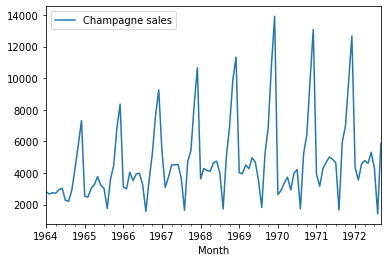

In [8]:
sales_data.plot()

In [9]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

(0.01, False)

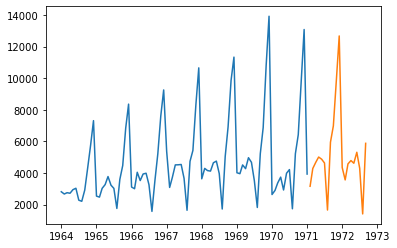

In [10]:
train = sales_data[:85]
test = sales_data[-20:]
plt.plot(train)
plt.plot(test)

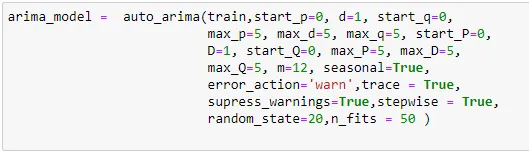

In [12]:
from pmdarima.arima import auto_arima
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.18 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.08 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.17 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.28 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.12 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.32 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.03 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.27 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.631, Time=0.63 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.22 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [13]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Thu, 23 Mar 2023   AIC                           1174.564
Time:                                     12:20:05   BIC                           1183.670
Sample:                                 01-01-1964   HQIC                          1178.189
                                      - 01-01-1971                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.542      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.133      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 200),index=test.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Month,
1971-02-01,2746.710907
1971-03-01,3247.908814
1971-04-01,3592.507516
1971-05-01,2800.874094
1971-06-01,3841.901364
1971-07-01,4088.019322
1971-08-01,1596.302687
1971-09-01,5089.999423
1971-10-01,6284.001747


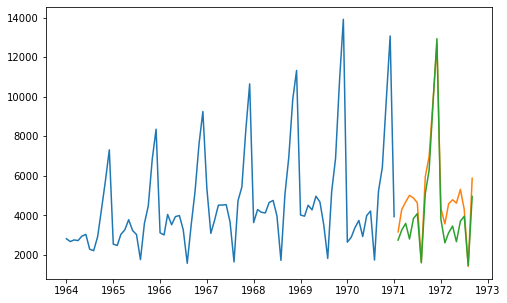

In [19]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
# plt.legend(loc = 'Left corner')
plt.show()

In [20]:
from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])

C:\Users\pc\AppData\Local\Temp\ipykernel_6136\402831588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_sales'] = prediction


0.811474156400944